In [1]:
##################################
# Download, merging and annotation
##################################

In [1]:
import GEOparse
import pandas as pd
import numpy as np


# для визуализации распределения семплов в пространстве признаков
def plot_mds(X, target, colors = ['green', 'red'], labels = ['CTRL', 'HCM']):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    mds = MDS(2,random_state=0)
    X_2d = mds.fit_transform(X_scaled)
    
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.rc('font', size=14)
    for i in np.unique(target):
        subset = X_2d[target == i]
        x = [row[0] for row in subset]
        y = [row[1] for row in subset]
        plt.scatter(x, y, c=colors[i], label = labels[i])
    plt.legend()
    plt.show()

In [2]:
dataset_name = "GSE36961" # набор на 145 семплов

gse = GEOparse.get_GEO(dataset_name)
data_train = gse.pivot_samples('VALUE')

# вытаскиваем лейблы семплов

experiments = {}
for i, (idx, row) in enumerate(gse.phenotype_data.iterrows()):
    tmp = {}
    tmp["Experiment"] = idx
    tmp['platform_id'] = row['platform_id']
    tmp['status'] = 'HCM' if 'HCM' in row['source_name_ch1'] else 'CTRL'
    experiments[i] = tmp
experiments = pd.DataFrame(experiments).T

gsm_to_stat = dict(zip(experiments['Experiment'], experiments['status']))
data_train.columns = [gsm_to_stat[i] for i in data_train.columns]

03-Sep-2021 12:41:57 DEBUG utils - Directory ./ already exists. Skipping.
03-Sep-2021 12:41:57 INFO GEOparse - File already exist: using local version.
03-Sep-2021 12:41:57 INFO GEOparse - Parsing ./GSE36961_family.soft.gz: 
03-Sep-2021 12:41:57 DEBUG GEOparse - DATABASE: GeoMiame
03-Sep-2021 12:41:57 DEBUG GEOparse - SERIES: GSE36961
03-Sep-2021 12:41:57 DEBUG GEOparse - PLATFORM: GPL15389
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907203
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907204
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907205
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907206
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907207
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907208
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907209
03-Sep-2021 12:41:57 DEBUG GEOparse - SAMPLE: GSM907210
03-Sep-2021 12:41:58 DEBUG GEOparse - SAMPLE: GSM907211
03-Sep-2021 12:41:58 DEBUG GEOparse - SAMPLE: GSM907212
03-Sep-2021 12:41:58 DEBUG GEOparse - SAMPLE: 

03-Sep-2021 12:42:07 DEBUG GEOparse - SAMPLE: GSM907343
03-Sep-2021 12:42:07 DEBUG GEOparse - SAMPLE: GSM907344
03-Sep-2021 12:42:07 DEBUG GEOparse - SAMPLE: GSM907345
03-Sep-2021 12:42:07 DEBUG GEOparse - SAMPLE: GSM907346
03-Sep-2021 12:42:07 DEBUG GEOparse - SAMPLE: GSM907347


In [3]:
dataset_name = "GSE1145"

gse = GEOparse.get_GEO(dataset_name)
data_test = gse.pivot_samples('VALUE')
data_test.head()

# вытаскиваем лейблы семплов

def status_extr(row):
    print(row['title'])
    print(row['description'].split('Keywords = ')[1], row['platform_id'])
    if 'N' in row['title']:
        return 'CTRL'
    if 'hypertrophic cardiomyopathy' in row['description'].split('Keywords = ')[1]:
        return 'HCM'
    elif 'congestive cardiomyopathy' in row['description'].split('Keywords = ')[1]:
        return 'CTRL'
    else:
        return 9999

experiments = {}
for i, (idx, row) in enumerate(gse.phenotype_data.iterrows()):
    tmp = {}
    tmp['title'] = row['title'][3:]
    tmp["Experiment"] = idx
    tmp['platform_id'] = row['platform_id']
    tmp['description'] = row['description'].split('Keywords = ')[1]
    tmp['status'] = status_extr(row)
    experiments[i] = tmp
experiments = pd.DataFrame(experiments).T

tmp_exp = experiments[experiments['status'] != 9999]#[experiments['platform_id'] == 'GPL570']

data_test = data_test.filter(tmp_exp['Experiment'])    #отбираем ту часть эксперимента, которая нам нужна, сделанная на GPL570. 
                                                    #Другая часть - исследование экспрессии микроРНК
gsm_to_stat = dict(zip(tmp_exp['Experiment'], tmp_exp['status']+'_'+tmp_exp['platform_id']))
data_test.columns = [gsm_to_stat[i] for i in data_test.columns]


03-Sep-2021 12:42:10 DEBUG utils - Directory ./ already exists. Skipping.
03-Sep-2021 12:42:10 INFO GEOparse - File already exist: using local version.
03-Sep-2021 12:42:10 INFO GEOparse - Parsing ./GSE1145_family.soft.gz: 
03-Sep-2021 12:42:10 DEBUG GEOparse - DATABASE: GeoMiame
03-Sep-2021 12:42:10 DEBUG GEOparse - SERIES: GSE1145
03-Sep-2021 12:42:10 DEBUG GEOparse - PLATFORM: GPL570
/opt/anaconda3/lib/python3.7/site-packages/GEOparse/GEOparse.py:104: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath)
03-Sep-2021 12:42:11 DEBUG GEOparse - PLATFORM: GPL8300
03-Sep-2021 12:42:12 DEBUG GEOparse - SAMPLE: GSM18422
03-Sep-2021 12:42:12 DEBUG GEOparse - SAMPLE: GSM18423
03-Sep-2021 12:42:12 DEBUG GEOparse - SAMPLE: GSM18424
03-Sep-2021 12:42:12 DEBUG GEOparse - SAMPLE: GSM18425
03-Sep-2021 12:42:12 DEBUG GEOparse - SAMPLE: GSM18426
03-Sep-2021 12:42:12 DEBUG GEOparse - SAMPLE: GSM18427
03-Sep-2021 12:42:12 DEBUG

PGA_PA-D_102
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_132
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_206
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_216
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_225
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_229
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_317
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_319
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_348
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_374
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_64
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_82
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_85
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_93
human, idiopathic, ischemic, cardiac, hypertrophy GPL570
PGA_PA-D_98
human, idiop

In [4]:
def annotation(data_test, platform):
    data_test['index'] = data_test.index

    # annotate with GPL
    data_test = data_test.reset_index().merge(gse.gpls[platform].table[["ID", "Gene Symbol"]],
                                    left_on='index', right_on="ID").set_index('index')
    del data_test["ID"]
    # remove probes without ENTREZ
    data_test = data_test.dropna(subset=['Gene Symbol'])
    # remove probes with more than one gene assigned
    data_test = data_test[~data_test['Gene Symbol'].str.contains("///")]
    # for each gene average LFC over probes
    data_test = data_test.groupby('Gene Symbol').median()
    return data_test

In [5]:
#этот блок появился для расширения тестового набора стенозниками
#аннотируем отдельно данные которые были получена на чипе GPL570 и на GPL8300

# GPL570
mask_570 = np.array(list(map(lambda x: 'GPL570' in x, data_test.columns)))
data_570 = data_test.loc[:,mask_570]
data_570_annot = annotation(data_570, 'GPL570')

# GPL8300
data_8300 = data_test.loc[:,mask_570 == False]
data_8300_annot = annotation(data_8300, 'GPL8300')

# merge 
data_8300_annot['index'] = data_8300_annot.index
data_570_annot['index'] = data_570_annot.index

data_8300_570 = data_8300_annot.reset_index().merge(data_570_annot,
                                    left_on='index', right_on="index").set_index('index')

data_570_annot = data_570_annot.iloc[:,:-1] #выкидываем индекс
data_test = data_570_annot #возвращаем название для дальнейщего анализа, как это делалось ранее

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
print('test:', data_test.shape)
print('train:', data_train.shape)

# отбираем те гены, которые есть в обоих наборах
set_test = set(data_test.index)
gene_universe = set_test.intersection(data_train.index)

data_train = data_train.filter(gene_universe, axis=0)
data_test = data_test.filter(gene_universe, axis=0)

print()
print('test:', data_test.shape)
print('train:', data_train.shape)

test: (21655, 16)
train: (37846, 145)

test: (14830, 16)
train: (14830, 145)


In [7]:
class Data(object): 
    def __init__(self):
        pass
    
Data.X = Data()
Data.X.train = data_train
Data.X.test = data_test
Data.y = Data()
Data.y.train = list(map(int, Data.X.train.columns == 'HCM'))
Data.y.test = list(map(int, Data.X.test.columns == 'HCM'))

In [49]:
#################################
# Feature selection
#################################

In [ ]:
"""
Главная идея:

Выборка маленькая, поэтому не будем избегать влияния случайности, например фиксируя random_state, а будем пытаться эту случайность оседлать.

Как будем отбирать фичи?

1) Фичи будем отбирать на основе лог.регрессии.
        а) подберем коэффициент L1-регуляризации
        б) будем обучать 1000 моделей на бутстрепленных из X_train данных
        в) фичи, которые попали в модель, которая хоть как-то работает (coef > 0) хоть в одной работающей (roc-auc > 0.7) моделе, будем сохранять в словарик

2) Отобранные фичи упорядочим по их ценности, за которую примем произведение roc-auc модели, из которой пришла фича, coef и количества моделей, в которые фича была включена.
                                            идея: чем в большее число хорошо работающих моделей включается фича - тем она ценнее

3) Финально выберем какую-то долю из тех фичей, которые входят в топ-20 фичей упорядоченного списка

"""

In [53]:
[1,2,3,4][-1]

4

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics, linear_model, model_selection
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shap
import random
from sklearn.manifold import MDS
from collections import Counter
from random import choices
from itertools import compress

roc_auc_scorer = metrics.make_scorer(metrics.roc_auc_score)
scaler = StandardScaler()

In [9]:
# train test split and scaling
X_train, X_test, y_train, y_test = train_test_split(Data.X.train.transpose(), 
                                                    Data.y.train, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [10]:
C = np.array([0.2, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01])

0
1
2
3
4


[<matplotlib.lines.Line2D at 0x7ff7575f4ed0>]

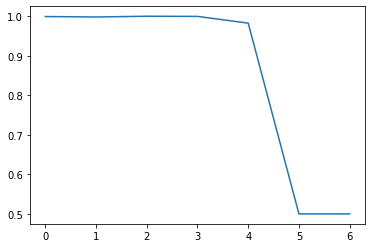

In [14]:
X_train = scaler.fit_transform(X_train)
# возвращаем имена фичей
X_train = pd.DataFrame(X_train, columns=Data.X.train.index)

# Подбираем коэффициент регуляризации. Выбираем тот, после которого всё качество идет по п*зде

result_df_train = pd.DataFrame()
result_df_test = pd.DataFrame()


# 10 раз шатаем модель по разным random_state, потом усредняем по смотрим на результат по коэффициентам

for a in range(0,5):
    print(a)
    random_state = random.randint(1,100)
    roc_auc_train = list()
    roc_auc_test = list()
    for i in C:
        linear_regressor = linear_model.LogisticRegression(penalty='l1', C=i, solver='liblinear', random_state=random_state)
        roc_auc_train.append(np.mean(cross_val_score(linear_regressor, X_train, y_train, scoring='roc_auc')))
    result_df_train[a] = roc_auc_train

plt.plot(result_df_train.apply(np.mean, axis=1))

In [13]:
class FeatureExtraction(object):
    
    """
    Класс для экстракции фичей. Главная идея не фиксировать случайность, а оседлать её :)
    
    """
    
    
    def __init__(self, ):
        pass
        
    def fit(self, n_iter, X_train, y_train, X_test, y_test, C=0.03):
        
        """
        Будем n_iter раз бутстрепить сбалансированную train выборку из X_train.
        Обучаем лог.рег. с L1-решуляризацией, с коэффициентом как мы отобрали выше.
        Тестим на X_test, значение добавляем в roc_auc_list
        
        Если на X_test модель работает круче 0.7, то: 
            1) ненулевые фичи модели добавляем в словарик отобранных фичей feature_dict
            2) обновляем число фичей в перменной len_best_feature = len(feature_dict.keys())
        Если нет, то:
            3) дублируем последнее значение в len_best_feature, т.к. число фичей не изменилось
        """
        
        len_best_feature = [0] # заводим лист, в котором будем отслеживать изменение количества фичей
        len_best_more_one = [0] # заводим лист, в котором будем отслеживать изменение количества числа включений уже включенных фичей
        roc_auc_list = list() # аналогично, отслеживаем как меняется roc-auc, так для интереса
        feature_dict = dict() # # словарь "ген: log.reg.coef"
        
        
        for i in range(0, n_iter):

            random_state = random.randint(0, 500) # явным образом шатаем рандомстейт

            # чтобы получить сбаланнсированную выборку, бутстрепим отдельно семплы из контроля и из опыта

            mask = np.array(y_train) == 0
            
            k_len = min(len(mask)-sum(mask), sum(mask)) #размер выборки бутстрепа, берем размер минимальной группы HCM или CTRL

            CTRL_rows = list(compress(range(0, len(mask)), mask))
            HCM_rows = list(compress(range(0, len(mask)), mask == False))

            _HCM_rows = choices(HCM_rows, k=k_len) # бутстрепим номера строк из группы больных
            _CTRL_rows = choices(CTRL_rows, k=k_len) # бутстрепим номера строк из группы здоровых

            # объединяем это всё дело обратно

            _X_train = pd.DataFrame(X_train).iloc[_HCM_rows + _CTRL_rows,:]
            _y_train = np.array(y_train)[_HCM_rows + _CTRL_rows]

            # обучаем лог.рег. с ранее отобранным коэффициентом регуляризации

            linear_regressor = linear_model.LogisticRegression(penalty='l1', C=C, solver='liblinear', 
                                                               random_state=random_state)
            linear_regressor.fit(_X_train, _y_train)

            # тестим

            roc_auc = metrics.roc_auc_score(y_score=linear_regressor.predict(X_test), y_true=y_test)
            roc_auc_list.append(roc_auc)

            # далее отбираем фичи из моделей, которые хоть как-то работают (roc_auc > 0.7)

            if roc_auc > 0.7:
                # отбираем смысловые фичи
                mask = linear_regressor.coef_ != 0 
                genes = X_train.columns[mask[0]]
                values = linear_regressor.coef_[mask]

                _feature_dict = dict(zip(genes, abs(values)*roc_auc)) #делаем временный словарь "ген: его ценность"

                # обнавляем глобальный словарь фичей
                for gene, values in _feature_dict.items():
                    if gene in feature_dict:
                        feature_dict[gene].append(values)
                    else:
                        feature_dict[gene] = [values]

                len_best_feature.append(len(feature_dict.keys()))
                
                feature_distr = np.array(list(map(lambda x: len(feature_dict[x]), feature_dict)))
                len_best_more_one.append(sum(feature_distr[feature_distr > 1]))
            
            else:
                # если модель была говёной, то просто дублируем предыдущее значение. Ну, число фичей то не изменилось :)
                len_best_feature.append(len_best_feature[-1])
                len_best_more_one.append(len_best_more_one[-1]) 
        
        
        
        self.len_best_more_one = np.array(len_best_more_one)
        self.len_best_feature = np.array(len_best_feature)
        self.feature_dict = feature_dict
        self.roc_auc_list = roc_auc_list
    

In [11]:
# Исходное разбиение, _test не трогаем
X, X_test, y, y_test = train_test_split(Data.X.train.transpose(), 
                                                    Data.y.train, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [82]:
df_bmo = list()
df_bf = list()


# train_test split and transformation
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=24)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# возвращаем имена фичей
X_train = pd.DataFrame(X_train, columns=Data.X.train.index)
X_test = pd.DataFrame(X_test, columns=Data.X.train.index)


for i in range(0,4):
    print(i)
    fe = FeatureExtraction()
    fe.fit(1500, X_train, y_train, X_test, y_test)
    df_bmo.append(fe.len_best_more_one)
    df_bf.append(fe.len_best_feature)

0
1
2
3


[<matplotlib.lines.Line2D at 0x7f80e8a433d0>]

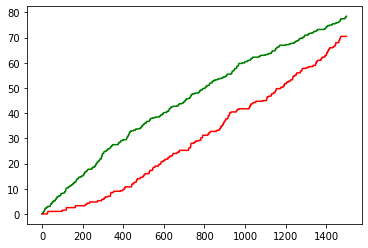

In [83]:
#посмотрим, как с каждой итерацией нарастают фичи

plt.plot(pd.DataFrame(df_bf).mean(), 'green') #прирост новых фичей
plt.plot(pd.DataFrame(df_bmo).mean(), 'red') #прирост фичей, которые уже встречались

In [14]:
"""
Идея: повторим экстракцию фичей 50 раз (вычислительно емко получается для ноутбучика), 
отсортируем каждый из получившихся наборов по важности фичей, найдем размер окна для отбора n-топ фичей, 
в котором состав фичей минимально изменяется от набора к набору. А потом отберем те фичи, которые всегда встречаются в окне этого размера.
"""

scaler = StandardScaler()
list_feature_dicts = list()

def class_chek(y):
    y = np.array(y)
    if sum(y == 0) == len(y):
        return(1)
    elif sum(y == 1) == len(y):
        return(1)
    else:
        return(0)

for i in range(0,50):
    print(i)
    # train_test split and transformation
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.2, random_state=i)
    
    if class_chek(y_train):
        continue
    if class_chek(y_test):
        continue
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # возвращаем имена фичей
    X_train = pd.DataFrame(X_train, columns=Data.X.train.index)
    X_test = pd.DataFrame(X_test, columns=Data.X.train.index)
    
    # отбор фичей
    fe = FeatureExtraction()
    fe.fit(2000, 
           X_train, y_train, X_test, y_test)
    list_feature_dicts.append(fe.feature_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [15]:
import json
with open('./list_feature_dicts_2000.json', 'w') as fp:
    json.dump(list_feature_dicts, fp)

In [25]:
with open('./list_feature_dicts_2000.json') as json_file:
    data = json.load(json_file)

In [26]:
lfd = data

In [31]:
#сортируем фичи в порядке убывания их значимости
#значимость считаем как (число включений в моедль)*(roc_auc_модели)*(abs(coef_))

lfd_sort = list()
for d in lfd:
    lfd_sort.append(dict(sorted(d.items(), key=lambda item: len(item[1]), reverse=True)))

"""
Идея:

Хотим выбрать топ n генов, который минимально изменяется от набора в lfd к набору (с точностью до перестановки). 
Очевидно 1 < n < минимального набора генов.

"""

result = list()

max_len = max(list(map(lambda x: len(x.keys()), lfd_sort))) # минимальная длина словаря feature_dict 

for yeld in range(1, max_len):
    
    similarity = np.zeros((len(lfd_sort),len(lfd_sort)))
    
    for i in range(0,len(lfd_sort)):
        
        one = list(lfd_sort[i].keys())
        if len(one) < max_len:
            one = one + [i for i in range(0,max_len-len(one))]
            
        for j in range(0,len(lfd_sort)):
            two = list(lfd_sort[j].keys())
            if len(one) < max_len:
                two = two + [i for i in range(0,max_len-len(two))]
            
            one_set = set(one[:yeld])
            two_set = set(two[:yeld])
            sim = len(one_set.intersection(two_set))/yeld
            similarity[i,j] = sim
    
    result.append(np.mean(similarity))

plt.plot(result)

In [47]:
#отбираем гены, которые всегда занимают в словарях первые n мест
TOP = 50

top_20_gene_list = map(lambda x: list(x.keys())[:TOP], lfd_sort)

top_gene = set()
for i in top_20_gene_list:
    top_gene.update(i)

# посчитаем gene_weight, как долю моделей, где gene находится на первых n-местах

gene_weight = dict()
for gene in top_gene:
    value = sum(list(map(lambda x: gene in list(x.keys())[:TOP], lfd_sort)))/len(lfd_sort)
    gene_weight[gene] = value

(array([193.,  45.,  25.,  10.,  11.,  11.,   8.,   4.,   2.,   3.]),
 array([0.02 , 0.094, 0.168, 0.242, 0.316, 0.39 , 0.464, 0.538, 0.612,
        0.686, 0.76 ]),
 <a list of 10 Patch objects>)

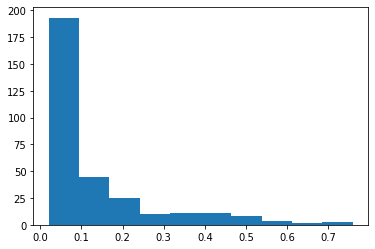

In [50]:
plt.hist(list(gene_weight.values()))

In [52]:
[k for k in gene_weight.keys() if gene_weight[k] > 0.5]

['CHRDL2',
 'MT1M',
 'IL18BP',
 'MGST1',
 'C1R',
 'FCN3',
 'SLA',
 'FPR1',
 'RARRES1',
 'S1PR3',
 'RASD1',
 'CDC42EP4']

In [20]:
# удаляем фичи, которые были включены только в одну модель, как сказали выше - это мусор

for i in range(0, len(lfd)):
    d = lfd[i]
    lfd[i] = {k : v for k, v in d.items() if len(v)>1}

In [21]:
gene_universe = set() #множество всех рассматриваемых генов
for i in range(0, len(lfd)):
    gene_universe.update(lfd[i].keys())

gene_weight = dict()
for gene in gene_universe:
    value = sum(list(map(lambda x: gene in list(x.keys()), lfd)))/len(lfd)
    gene_weight[gene] = value

LYVE1 FPR1 RARRES1 ZDHHC9 CHRDL2 CEBPD S1PR3 MYC SLCO4A1 FKBP5 PRKCD RASD1 SLA MT1M CDC42EP4 MGST1 METTL7B INPP1 C1R PIM1 CD163 FCN3

FCN3 MT1X PROS1 MYH6 CDC42EP4 ZFP36 PRKCD CEBPD


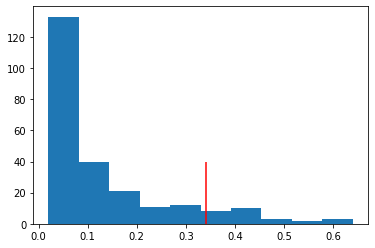

In [24]:
q_prob = np.quantile(list(gene_weight.values()), 0.90)
best_features = [k for k in gene_weight.keys() if gene_weight[k] > q_prob]
plt.hist(gene_weight.values())
plt.vlines(q_prob, 0, 40, 'red')
print(*best_features)
print()
print(*['FCN3', 'MT1X', 'PROS1', 'MYH6', 'CDC42EP4', 'ZFP36', 'PRKCD', 'CEBPD'])

MYH6 MT1M FCN3 RASD1 CEBPD CDC42EP4 PRKCD

FCN3 MT1X PROS1 MYH6 CDC42EP4 ZFP36 PRKCD CEBPD


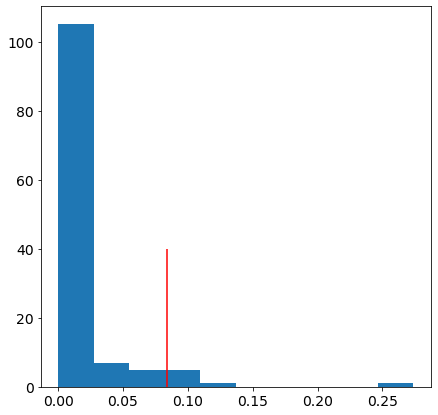

In [525]:
plt.hist(gene_weight.values())
plt.vlines(q_prob, 0, 40, 'red')
print(*best_features)
print()
print(*['FCN3', 'MT1X', 'PROS1', 'MYH6', 'CDC42EP4', 'ZFP36', 'PRKCD', 'CEBPD'])

In [ ]:
#################################
# model train
#################################

In [820]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import Normalizer

# для визуализации распределения семплов в пространстве признаков
def plot_mds(X, target, colors = ['green', 'red'], labels = ['CTRL', 'HCM']):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    mds = MDS(2, random_state=42)
    X_2d = mds.fit_transform(X_scaled)
    
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.rc('font', size=14)
    for i in np.unique(target):
        subset = X_2d[target == i]
        x = [row[0] for row in subset]
        y = [row[1] for row in subset]
        plt.scatter(x, y, c=colors[i], label = labels[i])
    plt.legend()
    plt.show()

scaler = StandardScaler()
normalizer = Normalizer()

def StandartScaling(X):
    
    scaler = StandardScaler()
    """
    X - matrix, features in columns, samples in rows
    """
    
    colnames = X.columns 
    X = X.transpose()   # StandardScaler работает по столбцам, поэтому транспонируем, чтобы в столбцах оказались семплы
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X.transpose(), columns=colnames)
    return(X)

In [821]:
X = pd.read_csv('./X_train.csv', index_col=0).transpose()
X_test_out = pd.read_csv('./X_test_out.csv', index_col=0).transpose()
X_test_out_extension = pd.read_csv('./X_test_out_extension.csv', index_col=0).transpose()

y = list(pd.read_csv('./y_train.csv').iloc[:,1])
y_test_out = list(pd.read_csv('./y_test_out.csv').iloc[:,1])
y_test_out_extension = list(pd.read_csv('./y_test_out_extension.csv').iloc[:,1])

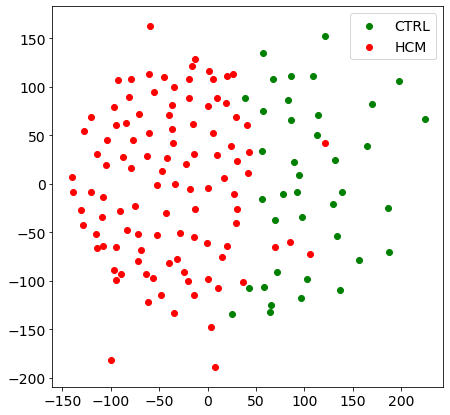

In [822]:
plot_mds(X, y)

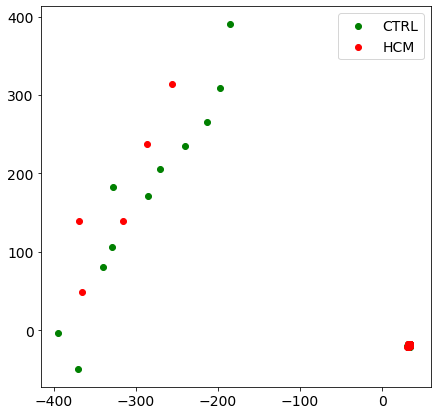

In [823]:
plot_mds(pd.concat([X_test_out, X]), y_test_out + y)

In [850]:
#best_features = ['FCN3', 'MT1X', 'PROS1', 'MYH6', 'CDC42EP4', 'ZFP36', 'PRKCD', 'LYVE1', 'CEBPD', 'MT1M', 'RASD1', 'S1PR3']
#best_features = ['FCN3', 'MT1X', 'PROS1', 'MYH6', 'CDC42EP4', 'ZFP36', 'PRKCD', 'CEBPD']

#X = Data.X.train.transpose().filter(best_features, axis=1)
#X_test_out = Data.X.test.transpose().filter(best_features, axis=1)
#y = Data.y.train
#y_test_out = Data.y.test

X = pd.read_csv('./X_train.csv', index_col=0).transpose().filter(best_features, axis=1)
X_test_out = pd.read_csv('./X_test_out.csv', index_col=0).transpose().filter(best_features, axis=1)
X_test_out_extension = pd.read_csv('./X_test_out_extension.csv', index_col=0).transpose().filter(best_features, axis=1)

y = list(pd.read_csv('./y_train.csv').iloc[:,1])
y_test_out = list(pd.read_csv('./y_test_out.csv').iloc[:,1])
y_test_out_extension = list(pd.read_csv('./y_test_out_extension.csv').iloc[:,1])

# этих фичей не хватает в расширенном наборе, т.к. стенозники делались на другой платформе
#X_test_out_extension['LYVE1'] = 0 
X_test_out_extension['MT1M'] = 0
X_test_out_extension['RASD1'] = 0
#X_test_out_extension['S1PR3'] = 0

print(X.shape, X_test_out.shape, X_test_out_extension.shape)

(145, 9) (16, 9) (33, 9)


In [847]:
X_test_n

ID_REF,MYH6,ZFP36,MT1M,FCN3,RASD1,C1R,CEBPD,CDC42EP4,PRKCD
0,0.493950,0.325860,0.258649,0.298038,0.261226,0.281422,0.332379,0.405642,0.267663
1,0.454986,0.339369,0.236068,0.314487,0.381123,0.253088,0.346487,0.335757,0.284766
2,0.479912,0.313582,0.262227,0.304785,0.293533,0.266805,0.349071,0.386665,0.284582
3,0.502306,0.311068,0.261663,0.318788,0.258737,0.264400,0.342980,0.384973,0.279536
4,0.482788,0.324020,0.231535,0.305786,0.275170,0.288442,0.368084,0.371075,0.287599
5,0.485856,0.330728,0.215542,0.325087,0.337181,0.255402,0.367157,0.344822,0.264190
6,0.472903,0.351155,0.276961,0.274685,0.341087,0.264961,0.345806,0.373357,0.235312
7,0.439682,0.364705,0.247971,0.262351,0.373284,0.247426,0.358912,0.380423,0.263159
8,0.502772,0.334856,0.253191,0.295811,0.274790,0.271142,0.326823,0.393526,0.269775
9,0.485850,0.342340,0.253748,0.291027,0.275944,0.271721,0.355718,0.380454,0.276423


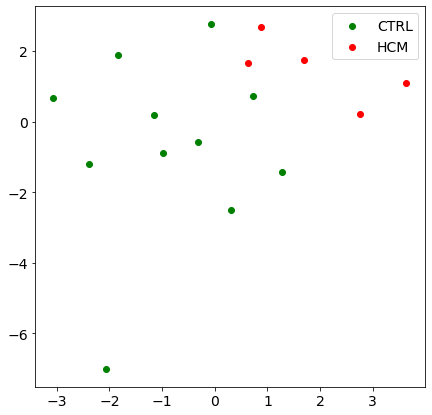

In [825]:
plot_mds(X_test_out, y_test_out)

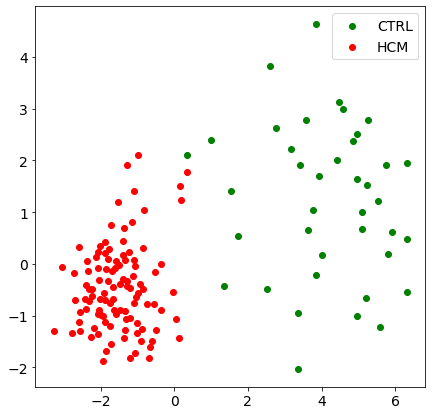

In [826]:
plot_mds(X, y)

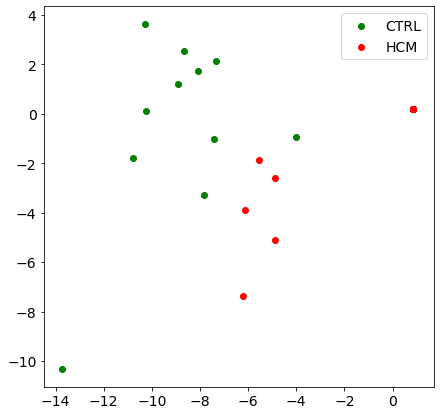

In [827]:
plot_mds(pd.concat([X, X_test_out]), y + y_test_out)

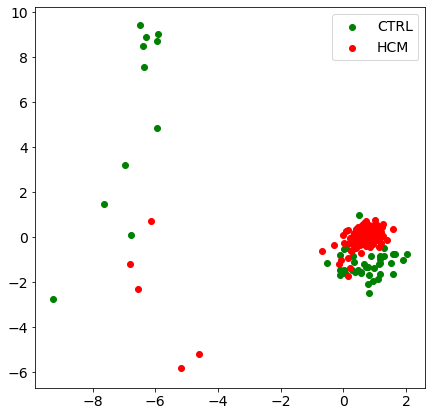

In [828]:
colnames = X.columns
X_norm = pd.DataFrame(normalizer.fit_transform(X), columns=colnames)
X_test_out_norm = pd.DataFrame(normalizer.fit_transform(X_test_out), columns=colnames)
plot_mds(pd.concat([X_norm, X_test_out_norm]), y + y_test_out)

In [842]:
rf_params = {'random_state': 42, 'n_estimators': 50, 'max_samples': 0.3, 'max_features': 'auto', 
             'max_depth': 9, 'class_weight': 'balanced', 'bootstrap': 'True'}

estimators = [
    ('rf', make_pipeline(#Normalizer(),
                         StandardScaler(),
                         RandomForestClassifier(**rf_params))),
    ('logreg', make_pipeline(Normalizer(),
                             StandardScaler(),
                             LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', 
                                                penalty='l2', C=0.2)))
     ]
clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(penalty='l2', C=1), 
                         passthrough = False)

In [843]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clfStack = clf.fit(X_train, y_train)

print("train:", metrics.roc_auc_score(y_score=clfStack.predict(X_train), 
                                      y_true=y_train))
print('test_in:', metrics.roc_auc_score(y_score=clfStack.predict(X_test), 
                                           y_true=y_test))
print("test_out:", metrics.roc_auc_score(y_score=clfStack.predict(X_test_out), 
                                     y_true=y_test_out))
print("test_out_ext:", metrics.roc_auc_score(y_score=clfStack.predict(X_test_out_extension), 
                                     y_true=y_test_out_extension))

train: 0.9608527131782946
test_in: 0.9444444444444444
test_out: 0.5
test_out_ext: 0.5


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 train
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 test


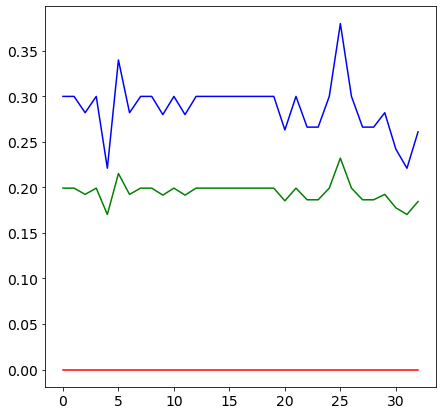

In [831]:
plt.plot(clf.estimators_[0].predict_proba(X_test_out_extension)[:,1], 'blue')
plt.plot(clf.estimators_[1].predict_proba(X_test_out_extension)[:,1], 'red')
plt.plot(clf.predict_proba(X_test_out_extension)[:,1], 'green')
print(*list(clf.predict(X_test_out_extension)), 'train')
print(*y_test_out_extension, 'test')

In [579]:
import xgboost as xgb

In [722]:
param_dist = {'objective':'binary:logistic', 
              'n_estimators':2000, 
              'max_depth': 3, 
              'learning_rate': 0.1, 
              'subsample': 0.5, 
              'scale_pos_weight': 0.2}

norm = Normalizer()
X_train_n = pd.DataFrame(norm.fit_transform(X_train), columns=X_train.columns)
X_test_n = pd.DataFrame(norm.fit_transform(X_test), columns=X_test.columns)
X_test_out_n = pd.DataFrame(norm.fit_transform(X_test_out), columns=X_test_out.columns)

clf = xgb.XGBModel(**param_dist)

clf.fit(X_train_n, y_train,
        eval_set=[(X_train_n, y_train), (X_test_n, y_test), (X_test_out_n, y_test_out)],
        eval_metric='auc',
        verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-auc:0.84264	validation_1-auc:0.86389	validation_2-auc:0.20000
[1]	validation_0-auc:0.95271	validation_1-auc:0.96389	validation_2-auc:0.20000
[2]	validation_0-auc:0.97984	validation_1-auc:0.96111	validation_2-auc:0.20000
[3]	validation_0-auc:0.98295	validation_1-auc:0.96111	validation_2-auc:0.20000
[4]	validation_0-auc:0.99089	validation_1-auc:0.95833	validation_2-auc:0.20000
[5]	validation_0-auc:0.99128	validation_1-auc:0.95833	validation_2-auc:0.20000
[6]	validation_0-auc:0.98992	validation_1-auc:0.95833	validation_2-auc:0.20000
[7]	validation_0-auc:0.99225	validation_1-auc:0.95833	validation_2-auc:0.20000
[8]	validation_0-auc:0.99264	validation_1-auc:0.95833	validation_2-auc:0.20000
[9]	validation_0-auc:0.99264	validation_1-auc:0.95833	validation_2-auc:0.20000
[10]	validation_0-auc:0.99264	validation_1-auc:0.95833	validation_2-auc:0.20000
[11]	validation_0-auc:0.99205	validation_1-auc:0.95833	validation_2-auc:0.20000
[12]	validation_0-auc:0.99205	validation_1-auc:0.9

[103]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[104]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[105]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[106]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[107]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[108]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[109]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[110]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[111]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[112]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[113]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[114]	validation_0-auc:0.99496	validation_1-auc:0.96389	validation_2-auc:0.34546
[115]	validation_0-auc:0.994

[205]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[206]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[207]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[208]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[209]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[210]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[211]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[212]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[213]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[214]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[215]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[216]	validation_0-auc:0.99612	validation_1-auc:0.96389	validation_2-auc:0.34546
[217]	validation_0-auc:0.996

[307]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[308]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[309]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[310]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[311]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[312]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[313]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[314]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[315]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[316]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[317]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[318]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[319]	validation_0-auc:0.996

[409]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[410]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[411]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[412]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[413]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[414]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[415]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[416]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[417]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[418]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[419]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[420]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.34546
[421]	validation_0-auc:0.996

[511]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[512]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[513]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[514]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[515]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[516]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[517]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[518]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[519]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[520]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[521]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[522]	validation_0-auc:0.99612	validation_1-auc:0.97778	validation_2-auc:0.30909
[523]	validation_0-auc:0.996

[613]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[614]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[615]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[616]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[617]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[618]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[619]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[620]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[621]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[622]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[623]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[624]	validation_0-auc:0.99690	validation_1-auc:0.97778	validation_2-auc:0.30909
[625]	validation_0-auc:0.996

[715]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[716]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[717]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[718]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[719]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[720]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[721]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[722]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[723]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[724]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[725]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[726]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[727]	validation_0-auc:0.997

[817]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[818]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[819]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[820]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[821]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[822]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[823]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[824]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[825]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[826]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[827]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[828]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[829]	validation_0-auc:0.997

[919]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[920]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[921]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[922]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[923]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[924]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[925]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[926]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[927]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[928]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[929]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[930]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[931]	validation_0-auc:0.997

[1020]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1021]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1022]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1023]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1024]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1025]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1026]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1027]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1028]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1029]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1030]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1031]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1032]	validatio

[1120]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1121]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1122]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1123]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1124]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1125]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1126]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1127]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1128]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1129]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1130]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1131]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1132]	validatio

[1220]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1221]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1222]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1223]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1224]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1225]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1226]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1227]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1228]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1229]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1230]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1231]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1232]	validatio

[1320]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1321]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1322]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1323]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1324]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1325]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1326]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1327]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1328]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1329]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1330]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1331]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1332]	validatio

[1420]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1421]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1422]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1423]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1424]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1425]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1426]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1427]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1428]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1429]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1430]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1431]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1432]	validatio

[1520]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1521]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1522]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1523]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1524]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1525]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1526]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1527]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1528]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1529]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1530]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1531]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.56364
[1532]	validatio

[1620]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1621]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1622]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1623]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1624]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1625]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1626]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1627]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1628]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1629]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1630]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1631]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1632]	validatio

[1720]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1721]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1722]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1723]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1724]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1725]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1726]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1727]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1728]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1729]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1730]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1731]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1732]	validatio

[1820]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1821]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1822]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1823]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1824]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1825]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1826]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1827]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1828]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1829]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1830]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1831]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1832]	validatio

[1920]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1921]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1922]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1923]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1924]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1925]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1926]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1927]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1928]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1929]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1930]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1931]	validation_0-auc:0.99729	validation_1-auc:0.97778	validation_2-auc:0.30909
[1932]	validatio

In [583]:
plt.plot(clf.estimators_[0].predict_proba(X_test_out)[:,1], 'blue')
plt.plot(clf.estimators_[1].predict_proba(X_test_out)[:,1], 'red')
plt.plot(clf.predict_proba(X_test_out)[:,1], 'green')
print(*list(clf.predict(X_test_out)), 'train')
print(*y_test_out, 'test')

AttributeError: 'StackingClassifier' object has no attribute 'estimators_'

In [12]:
#################################
# interpretaion
#################################

In [13]:
import shap

In [14]:
X_train_summary = shap.kmeans(X_train, 10)
ex = shap.KernelExplainer(clfStack.predict, X_train_summary)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


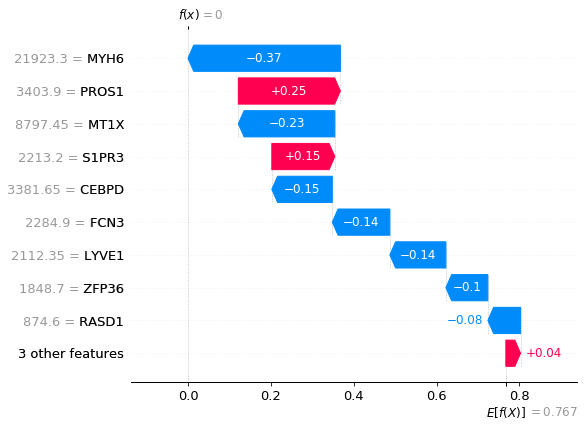

In [33]:
shap.initjs()
shap_values = ex.shap_values(X_test_out.iloc[9,:])
shap.plots.waterfall.waterfall_plot(ex.expected_value, shap_values, X_test_out.iloc[9,:])

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


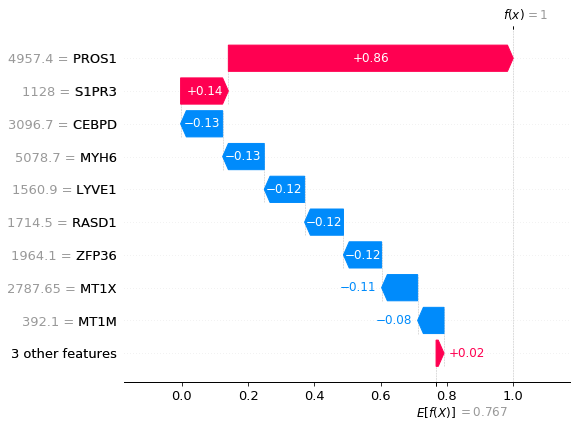

In [34]:
shap.initjs()
shap_values = ex.shap_values(X_test_out.iloc[13,:])
shap.plots.waterfall.waterfall_plot(ex.expected_value, shap_values, X_test_out.iloc[13,:])

In [32]:
shap.initjs()
shap_values = ex.shap_values(X_test_out)
shap.force_plot(ex.expected_value, shap_values, X_test_out)

  0%|          | 0/16 [00:00<?, ?it/s]

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

In [16]:
def shap_plot(X, y, shap_values):

    spdf = pd.DataFrame(shap_values[np.array(y) != 1,:], columns=X.columns)

    spdf_ctrl = pd.DataFrame(spdf.sum(axis=0), columns=['CTRL'])

    spdf_hcn = pd.DataFrame(shap_values[np.array(y) == 1,:], columns=X.columns)
    spdf_hcn = pd.DataFrame(spdf_hcn.sum(axis=0), columns=['HCM'])

    spdf = pd.concat([spdf_hcn, spdf_ctrl], axis=1)

    x = spdf['CTRL']
    y = spdf['HCM']

    plt.figure(figsize=(13,13))
    plt.scatter(x, y)
    plt.axvline(0)
    plt.axhline(0)
    plt.xlabel('CTRL SHAPE value')
    plt.ylabel('HCM SHAPE value')
    for i, txt in enumerate(spdf.index):
        plt.annotate(txt, (x[i], y[i]))

    return(spdf)
    #plt.savefig('./shape_by_gene.png', dpi = 300)

  0%|          | 0/16 [00:00<?, ?it/s]

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

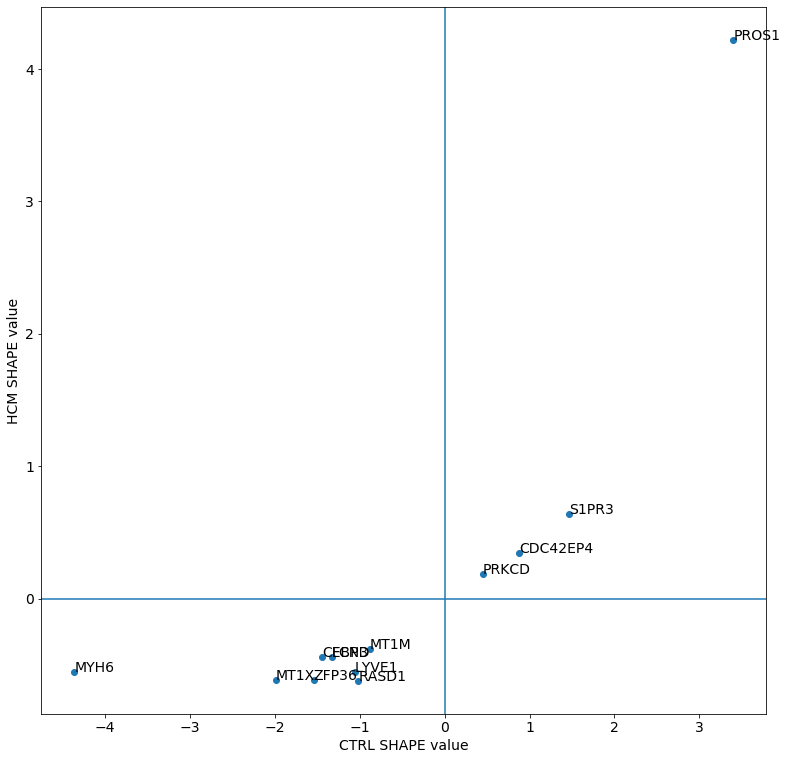

In [31]:
shap_values = ex.shap_values(X_test_out)
spdf = shap_plot(X_test_out, y_test_out, shap_values)
spdf.to_csv('../best_genes_SHAPE_distance.csv')

In [21]:
#################################
# reactome 
#################################

In [37]:
print(*best_features, sep=', ')

FCN3, MT1X, PROS1, MYH6, CDC42EP4, ZFP36, PRKCD, LYVE1, CEBPD, MT1M, RASD1, S1PR3


In [43]:
import json

In [44]:
f = open('../Data/ReactomePathways.gmt', 'r')

Reactome_path = dict()
for i in f:
    line = i.rstrip('\n').split('\t')
    Reactome_path[line[1]] = {'name': line[0], 
                           'genes': line[2:]}

In [45]:
def grep_path_ID(x, gene):
    if gene in Reactome_path[x]['genes']:
        return x

gene_to_path = dict()
for gene in best_features:
    _paths = np.array(list(map(lambda x: grep_path_ID(x, gene=gene), Reactome_path.keys())))
    
    _paths = list(_paths[_paths != None])
    
    gene_to_path[gene] = dict()
    
    if len(_paths) != 0:
    
        for path in _paths:
            if len(Reactome_path[path]['genes']) < 500:
                gene_to_path[gene][path] = Reactome_path[path]['genes']

In [26]:
with open('../Data/best_gene_to_path.json', 'w') as outfile:
    json.dump(gene_to_path, outfile)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd3ce19910>,
      dtype=object)

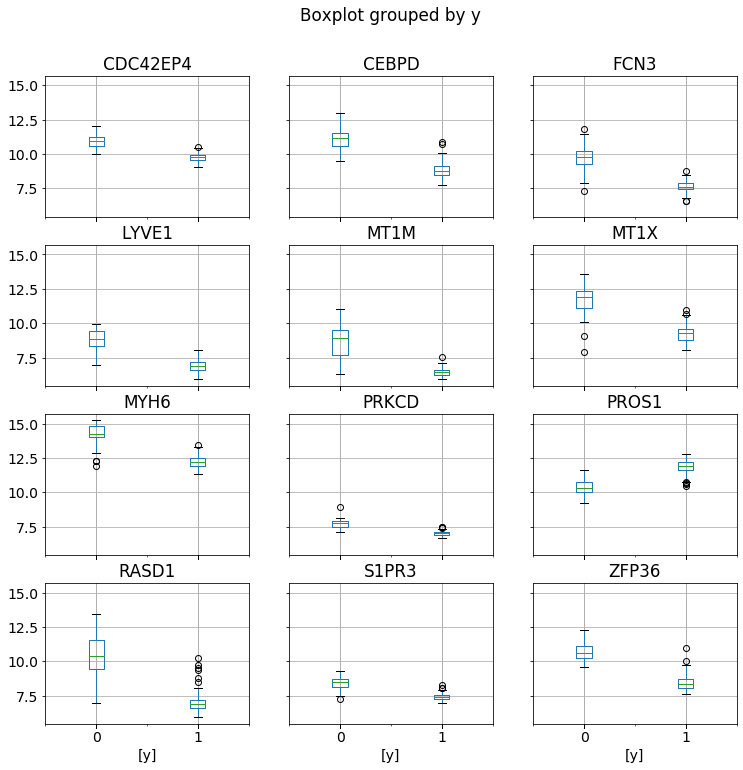

In [40]:
data = X
data['y'] = y
data.head()
data.boxplot(by='y', figsize=(12,12))

In [262]:
ATG = Reactome_path['R-HSA-9612973']['genes']

ATG = Reactome_path['R-HSA-5205647']['genes']

ATG = ['LC3II', 'BECN1', 'BCL2', 'BAX', 'CASP3']

In [263]:
X = pd.read_csv('./X_train.csv', index_col=0).transpose()

In [240]:
colnames = X.columns
normalizer = Normalizer()
data = pd.DataFrame(normalizer.fit_transform(np.log(X)), columns=colnames)

In [241]:
data = pd.DataFrame(data.transpose())

In [242]:
data.to_csv('./for_Reactome_GSEA.csv')

In [247]:
np.array(data.columns)[np.array(y)==0]

array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144])

In [264]:
X_ATG = np.log(X.loc[:,list(map(lambda x: x in ATG, X.columns))])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd0bdfc210>,
      dtype=object)

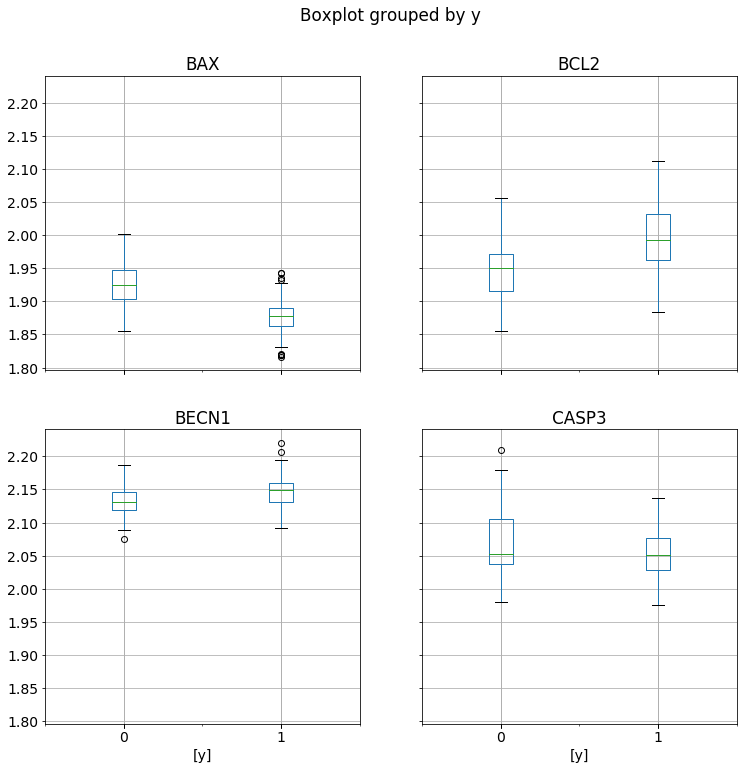

In [265]:
X_ATG['y'] = y
X_ATG.boxplot(by='y', figsize=(12,12)) 

In [270]:
pvalues = list()
for i in range(0,X_ATG.shape[1]-1):
    pvalue = stats.wilcoxon(X_ATG.iloc[:,i][np.array(y)==1][0:39], X_ATG.iloc[:,i][np.array(y)==0]).pvalue
    pvalues.append(pvalue)
    
pvalues_adj = multi.multipletests(pvalues, method='fdr_bh')[1]

In [198]:
import statsmodels.stats.multitest as multi

In [273]:
list(zip(X_ATG.columns, pvalues_adj))

[('BECN1', 0.022691528801486407),
 ('BCL2', 5.131492843088875e-06),
 ('BAX', 3.123793014241283e-06),
 ('CASP3', 0.4595337043249743)]

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.12379301e-06, 4.59561818e-02, 9.19092399e-02, 1.37862298e-01,
        1.83815356e-01, 2.29768414e-01, 2.75721472e-01, 3.21674530e-01,
        3.67627588e-01, 4.13580646e-01, 4.59533704e-01]),
 <a list of 10 Patch objects>)

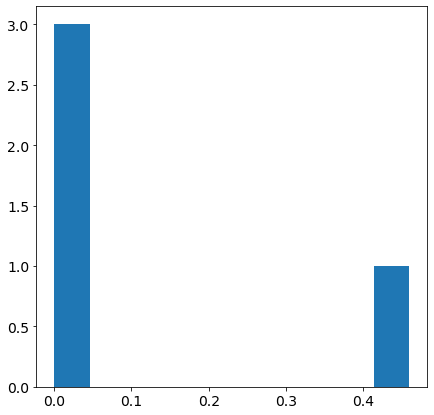

In [272]:
plt.hist(pvalues_adj)

In [211]:
np.array(X_ATG.columns)[np.array(pvalues_adj) < 0.05]

array(['APOB', 'APOA1', 'GSN', 'AKR1C4', 'GNB1', 'AGRN', 'SDC2', 'MYO1C',
       'OR51E1', 'EPB41L1', 'AKR1B10', 'RDH10', 'PDE6A', 'MYH9', 'KCNMA1',
       'RDH5', 'GUCA1C', 'SPTAN1', 'MSN', 'AKR1C3', 'METAP2', 'CTBP2',
       'GPC1', 'XIRP2', 'PDE6B', 'SPTBN1', 'LRP8', 'EPB41L3', 'DHRS3',
       'FAM65B', 'APOE', 'LDLR', 'GRK4', 'TMIE', 'GUCA1B', 'RETSAT',
       'NMT1', 'KCNMB1', 'CAPZB', 'GPIHBP1', 'NAPEPLD', 'MYO7A', 'DNAJC5',
       'CABP1', 'PRKCQ', 'RBP1', 'GNAT1', 'APOM'], dtype=object)

In [115]:
np.array(X_ATG.columns)[np.array(pvalues) < 0.05]

array(['PRKAA2', 'PCNT', 'PARK7', 'ATG7', 'GABARAP', 'MAP1LC3A',
       'CSNK2A1', 'WDR45', 'VPS37C', 'RRAGB', 'DYNLL1', 'VPS37A',
       'PIK3R4', 'MFN2', 'GABARAPL1', 'CHMP4B', 'ATG4C', 'TOMM40',
       'MTMR3', 'HSF1', 'DYNC1LI2', 'CHMP2A', 'BECN1', 'ATG4D', 'RNASE1',
       'RRAGD', 'FUNDC1', 'HBB', 'DYNC1H1', 'ATG4B', 'UBAP1', 'ULK1',
       'RB1CC1', 'IFT88', 'TSC1', 'ATG5', 'RHEB', 'CSNK2A2', 'GABARAPL2',
       'PGAM5', 'VDAC1', 'WIPI1', 'CHMP7', 'VPS37B', 'MTMR14', 'VPS37D',
       'UBC', 'PRKAG1', 'MAP1LC3B', 'EPAS1', 'DYNC1LI1', 'UBB', 'ATM',
       'PRKAB2', 'ATG10', 'VCP'], dtype=object)